In [1]:
import os, sys
import tqdm
import torch
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import yaml

from numpy import random

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device(torch.cuda.current_device()) if is_cuda else torch.device("cpu")

if is_cuda:
    torch.backends.cudnn.benchmark = True
    #torch.backends.cudnn.deterministic = True

In [3]:
import importlib

In [4]:
from holodecml.datasets import LoadHolograms

In [5]:
# importlib.reload(LoadHolograms)

In [12]:
with open("/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/manopt/model.yml") as cf:
    conf = yaml.load(cf, Loader=yaml.FullLoader)

lookahead = 5 #int(conf["data"]["lookahead"])
conf["model"]["in_channels"] = 2 * (lookahead + 1)

n_bins = 100 #int(conf["data"]["n_bins"])
tile_size = int(conf["data"]["tile_size"])
step_size = int(conf["data"]["step_size"])

train_dataset = LoadHolograms(
    "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/synthetic_holograms_500particle_gamma_4872x3248_training.nc", 
    shuffle = False, 
    device = device, 
    n_bins = n_bins, 
    # transform = LoadTransformations(conf["transforms"]["training"]), 
    lookahead = lookahead, 
    tile_size = tile_size, 
    step_size = step_size,
    output_lst = [torch.real,torch.imag]
)


In [13]:
# random_integer = random.randint(0, train_dataset.__len__())
random_integer = 9321
print("Id", random_integer)
x, y1, y2 = train_dataset.__getitem__(random_integer)
print(x.shape, y1.shape, y2.shape)
print("Mask 1 sum", y1.sum())
print("Mask 2 sum", y2.sum())

Id 9321


AttributeError: 'LoadHolograms' object has no attribute 'output_lst'

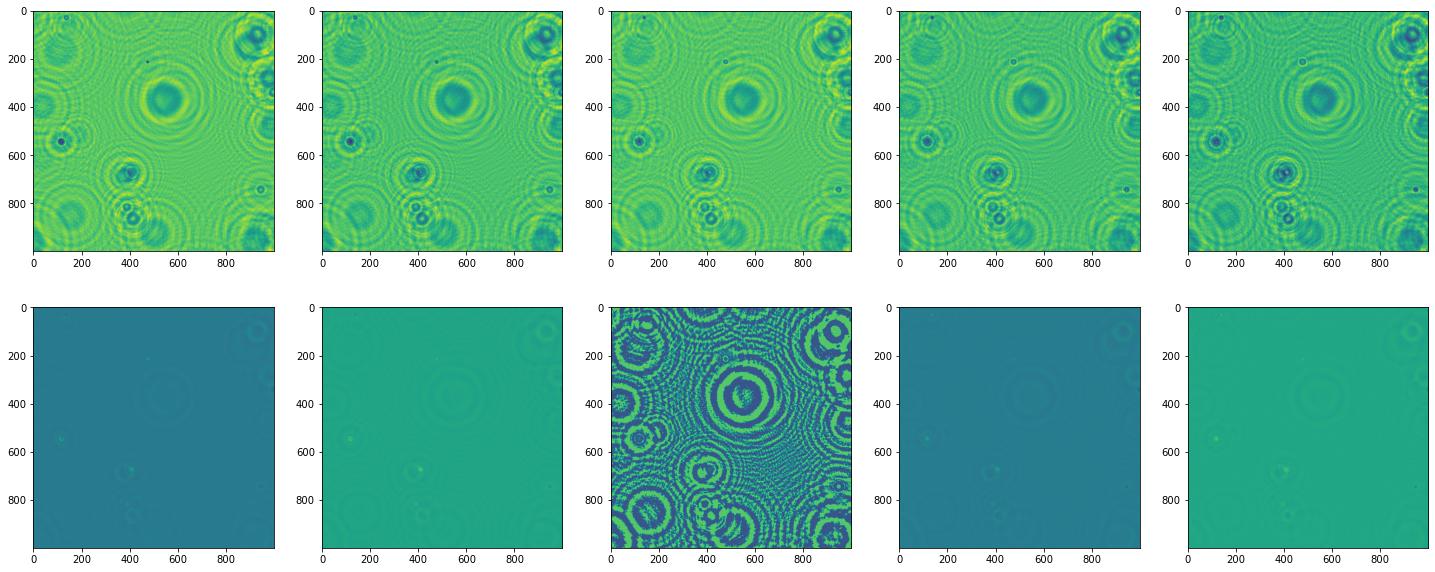

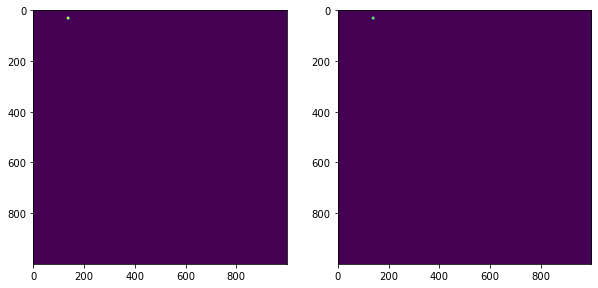

In [11]:
fig,ax_lst = plt.subplots(2,lookahead,figsize=(5*lookahead,10))

rw_slc = slice(1500, 2500)
cl_slc = slice(1500, 2500)

for pln_idx in range(lookahead):
    ax = ax_lst[0,pln_idx]
    ax.imshow(x[0,pln_idx,rw_slc,cl_slc].detach().cpu().numpy().T)
    ax = ax_lst[1,pln_idx]
    ax.imshow(x[0,pln_idx+lookahead,rw_slc,cl_slc].detach().cpu().numpy().T,vmin=-2*np.pi,vmax=2*np.pi)

# ax = ax_lst[0,1]
# ax.imshow(x[0,1,1500:2500,1500:2500].detach().cpu().numpy().T)

# ax = ax_lst[0,2]
# ax.imshow(x[0,2,1500:2500,1500:2500].detach().cpu().numpy().T)

# ax = ax_lst[1,0]
# ax.imshow(x[0,3,1500:2500,1500:2500].detach().cpu().numpy().T,vmin=-np.pi,vmax=np.pi)

# ax = ax_lst[1,1]
# ax.imshow(x[0,4,1500:2500,1500:2500].detach().cpu().numpy().T,vmin=-np.pi,vmax=np.pi)

# ax = ax_lst[1,2]
# ax.imshow(x[0,5,1500:2500,1500:2500].detach().cpu().numpy().T,vmin=-np.pi,vmax=np.pi)

fig,ax_lst = plt.subplots(1,2,figsize=(10,5))
ax = ax_lst[0]
ax.imshow(y1[rw_slc,cl_slc].detach().cpu().numpy().T,vmin=0,vmax=1)

ax = ax_lst[1]
ax.imshow(y2[rw_slc,cl_slc].detach().cpu().numpy().T,vmin=0,vmax=500)

In [28]:
y1.shape

torch.Size([4896, 3264])

In [11]:
train_dataset.z_fwd_idx

2

In [14]:
random_integer

72758